In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [3]:
base_dir = "/content/drive/MyDrive/Alzheimer_s Dataset"

In [4]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [5]:
train=base_dir+ '/train'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 3180 files belonging to 4 classes.
Using 2544 files for training.


In [6]:
val=base_dir+ '/train'

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 3180 files belonging to 4 classes.
Using 636 files for validation.


In [7]:
test=base_dir +'/test'

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [8]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [9]:
train_data.class_names = class_names
val_data.class_names = class_names

In [10]:
print(val_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


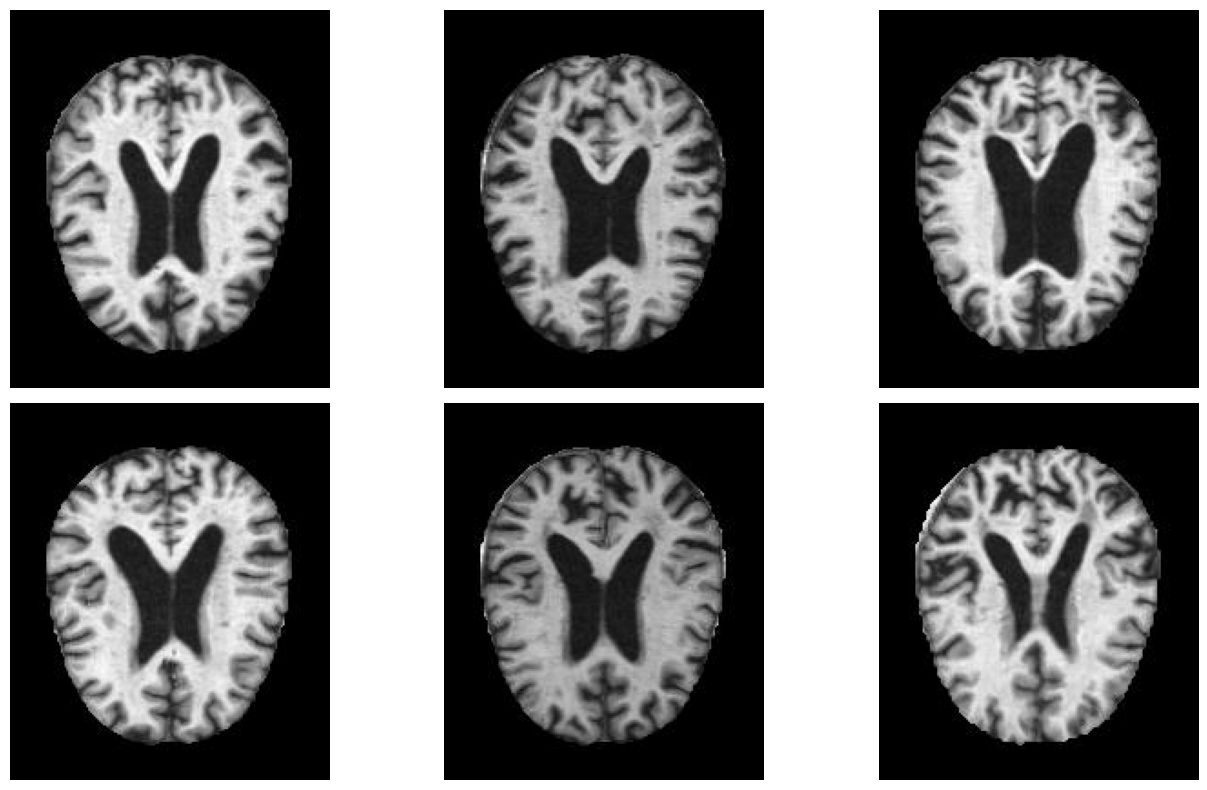

In [11]:
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

MildDemented_dir= '/content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented'
visualize(MildDemented_dir)

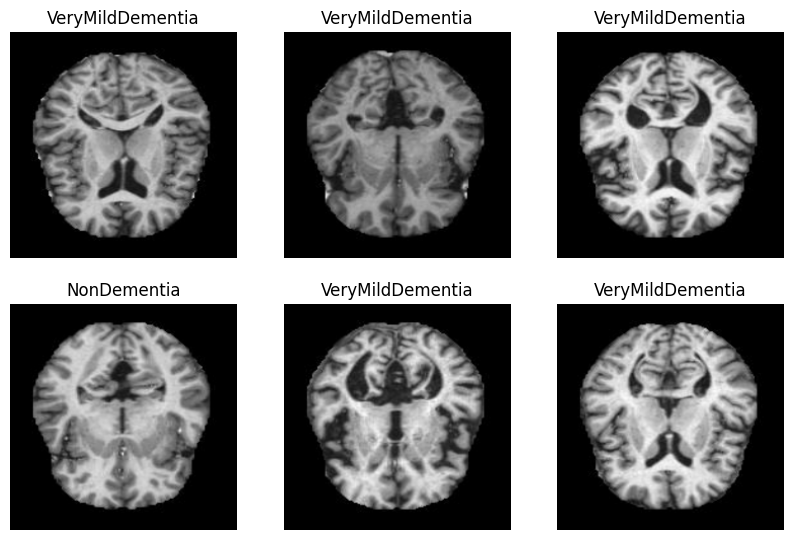

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [13]:
model=Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#history = model.fit(train_data, validation_data=val_data, epochs=85)

Epoch 1/100
129/129 [==============================] - 612s 5s/step - loss: 2.9409 - accuracy: 0.2501 - val_loss: 1.3177 - val_accuracy: 0.5083
Epoch 2/100
129/129 [==============================] - 247s 2s/step - loss: 1.3659 - accuracy: 0.3547 - val_loss: 1.2775 - val_accuracy: 0.5083
Epoch 3/100
129/129 [==============================] - 251s 2s/step - loss: 1.2947 - accuracy: 0.4317 - val_loss: 1.2471 - val_accuracy: 0.5083
Epoch 4/100
129/129 [==============================] - 247s 2s/step - loss: 1.2588 - accuracy: 0.4576 - val_loss: 1.1680 - val_accuracy: 0.5083
Epoch 5/100
129/129 [==============================] - 271s 2s/step - loss: 1.1949 - accuracy: 0.4734 - val_loss: 1.1424 - val_accuracy: 0.5083
Epoch 6/100
129/129 [==============================] - 248s 2s/step - loss: 1.1452 - accuracy: 0.4824 - val_loss: 1.1247 - val_accuracy: 0.5083
Epoch 7/100
129/129 [==============================] - 246s 2s/step - loss: 1.1137 - accuracy: 0.4920 - val_loss: 1.1037 - val_accuracy:

In [ ]:
#model.evaluate(test_data)

In [ ]:
#model.save("model.h5")

In [ ]:
# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# plt.plot(loss_train, 'g', label='Training loss')
# plt.plot(loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig("train_vs_val_loss.png")
# plt.show()

NameError: name 'history' is not defined

In [ ]:
# accuracy_train = history.history['accuracy']
# accuracy_val = history.history['val_accuracy']
# plt.plot(accuracy_train, 'g', label='Training accuracy')
# plt.plot(accuracy_val, 'b', label='Validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.savefig("train_vs_val_acc.png")
# plt.show()

In [26]:
pretrained_model = tf.keras.models.load_model("/content/drive/MyDrive/model.h5")


In [27]:
pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
# Evaluate the model on train and test datasets
train_evaluation = pretrained_model.evaluate(train_data)
test_evaluation = pretrained_model.evaluate(test_data)

# Access accuracy from the evaluation results
train_accuracy = train_evaluation[1]
test_accuracy = test_evaluation[1]

# Print the accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



40/40 [==============================] - 216s 4s/step - loss: 1.6656 - accuracy: 0.7209
Train Accuracy: 0.9968553185462952
Test Accuracy: 0.7208756804466248


In [15]:
CLASSES = {0: "Mild Dementia", 1: "Moderate Dementia", 2: "Non Dementia", 3: "Very Mild Dementia"}

1/1 [==============================] - 0s 37ms/step


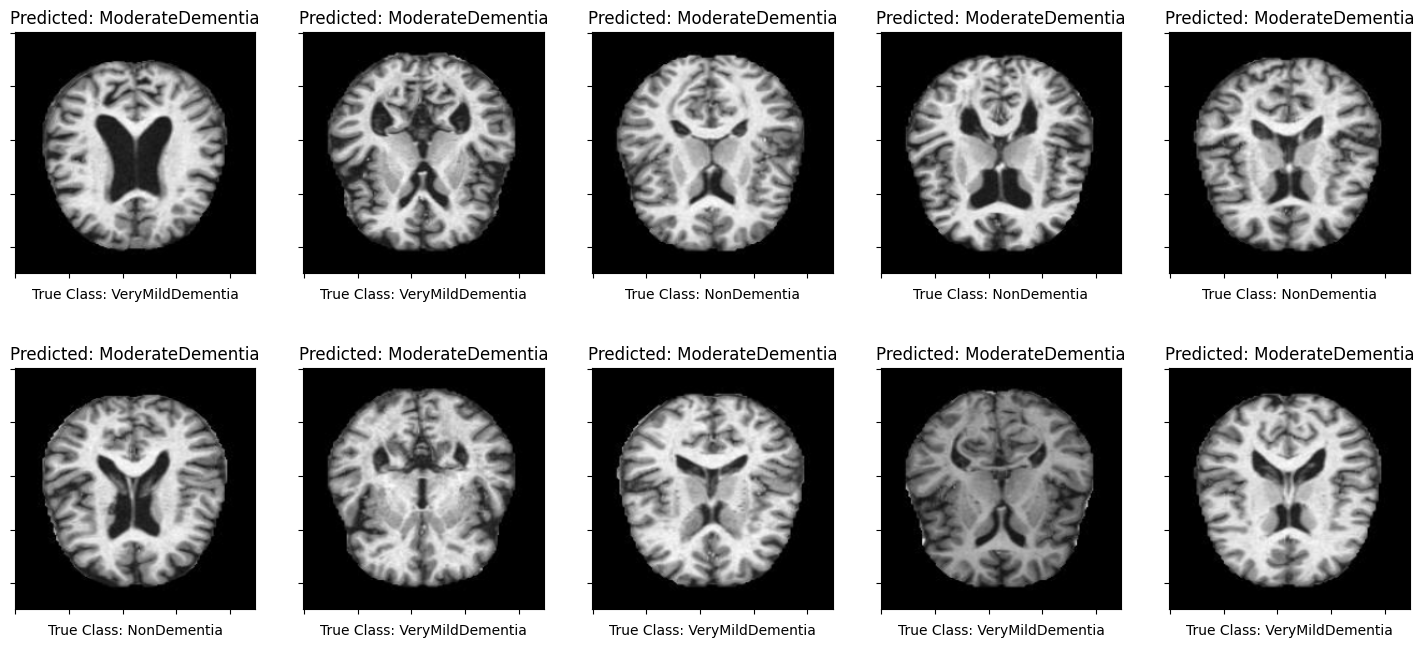

In [16]:
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))

1/1 [==============================] - 0s 49ms/step
Confusion Matrix:
[[294   0]
 [  1 341]]


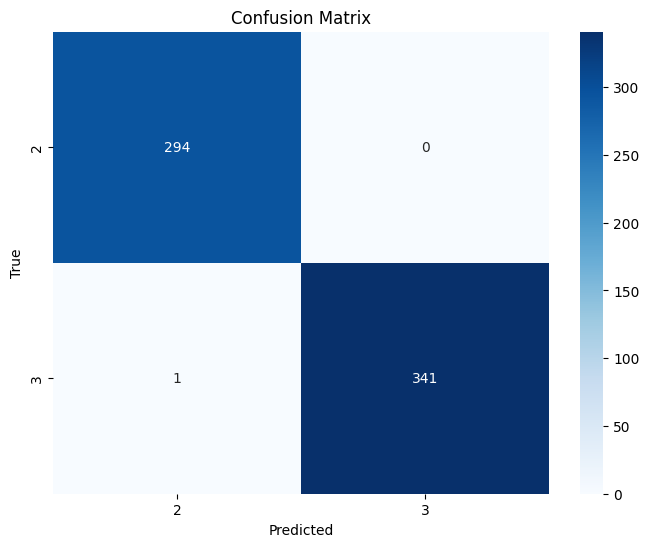

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       294
           3       1.00      1.00      1.00       342

   micro avg       1.00      1.00      1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636

2: Precision=0.9966101694915255, Recall=1.0, F1 Score=0.99830220713073
3: Precision=1.0, Recall=0.9970760233918129, F1 Score=0.9985358711566619


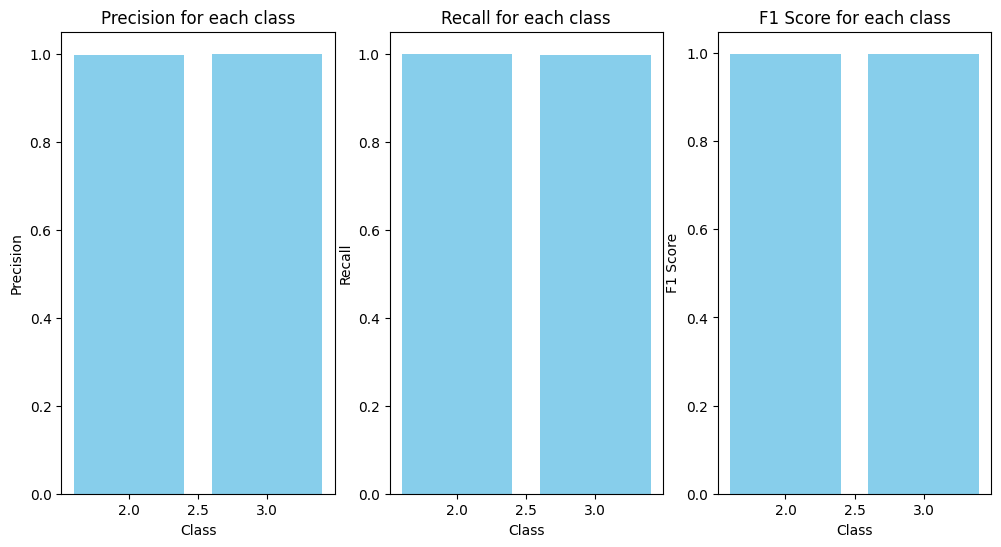

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


val_predictions = []
val_true_labels = []
for images, labels in val_data:
    predictions = pretrained_model.predict(images)
    val_predictions.extend(np.argmax(predictions, axis=1))
    val_true_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(val_true_labels, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()

# Ensure that val_predictions and val_true_labels contain all classes present in target_names
# You may need to modify this part of the code if necessary

# If val_predictions contain class indices, and class_names is a list of class names:
# unique_classes = np.unique(val_predictions)
# unique_class_names = [class_names[i] for i in unique_classes]

# If val_predictions already contain class names, you can directly use them
unique_class_names = np.unique(val_predictions)
# Convert unique_class_names to a list of strings if necessary
unique_class_names = [str(class_name) for class_name in unique_class_names]

# Then, you can generate the classification report with specified labels parameter
class_report = classification_report(val_true_labels, val_predictions, labels=unique_class_names, target_names=unique_class_names)
print("Classification Report:")
print(class_report)



precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

for i, class_name in enumerate(class_names):
    print(f"{class_name}: Precision={precision[i]}, Recall={recall[i]}, F1 Score={f1_score[i]}")

metrics_names = ["Precision", "Recall", "F1 Score"]
metrics_values = [precision, recall, f1_score]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.bar(class_names, metrics_values[i], color='skyblue')
    plt.title(f"{metrics_names[i]} for each class")
    plt.xlabel("Class")
    plt.ylabel(metrics_names[i])
plt.savefig("metrics_bar_plots.png")
plt.show()


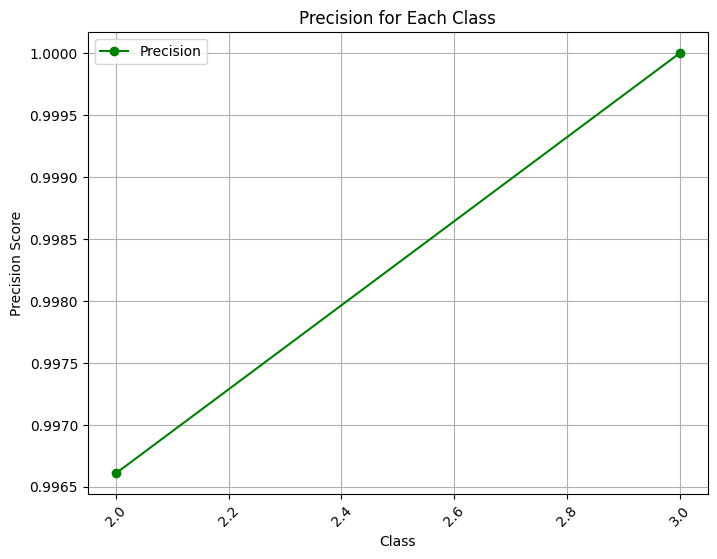

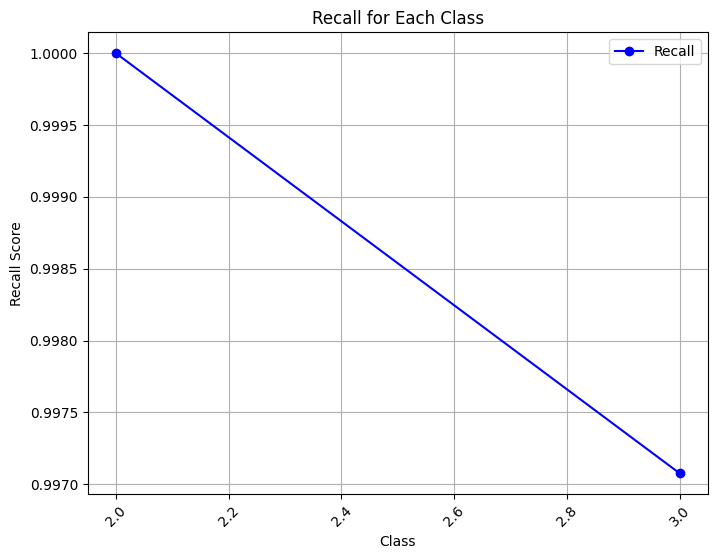

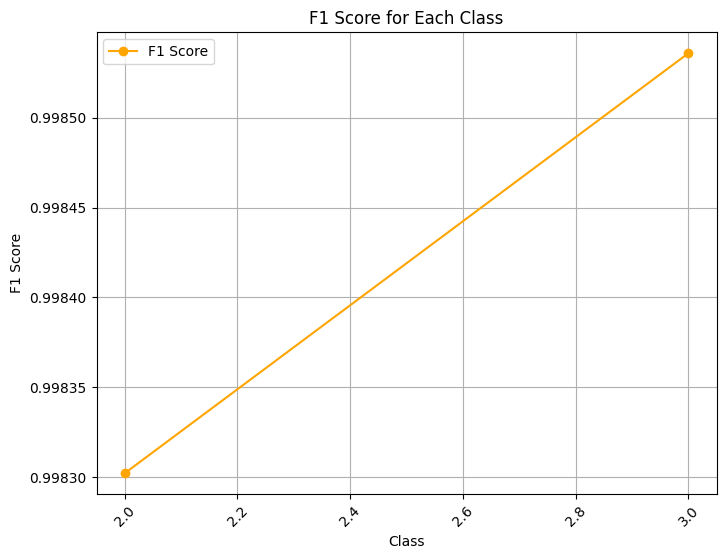

In [36]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score from the confusion matrix
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(8, 6))
plt.plot(class_names, precision, marker='o', label='Precision', color='green')
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("precision_line_plot.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(class_names, recall, marker='o', label='Recall', color='blue')
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("recall_line_plot.png")
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(class_names, f1_score, marker='o', label='F1 Score', color='orange')
plt.title('F1 Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("f1_score_line_plot.png")
plt.show()


1/1 [==============================] - 0s 129ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


IndexError: index 2 is out of bounds for axis 0 with size 2

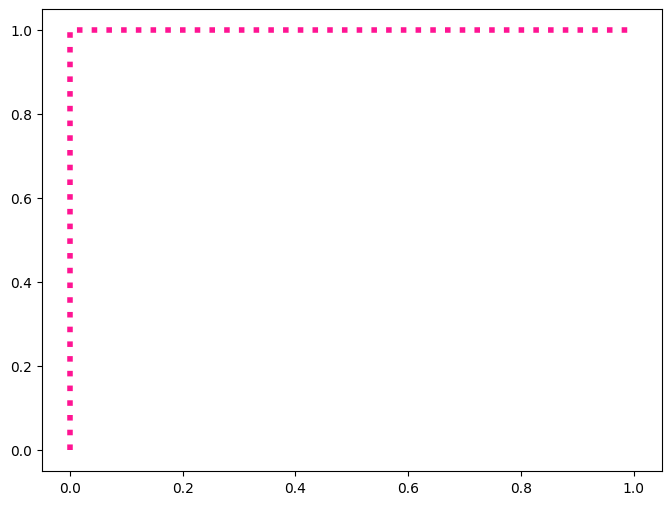

In [37]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

loaded_model = tf.keras.models.load_model('/content/model.h5')

val_predictions = []
val_true_labels = []
for images, labels in val_data:
    predictions = loaded_model.predict(images)
    val_predictions.extend(predictions)
    val_true_labels.extend(labels.numpy())

val_predictions = np.array(val_predictions)
val_true_labels = np.array(val_true_labels)

val_true_labels_bin = label_binarize(val_true_labels, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(val_true_labels_bin[:, i], val_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(val_true_labels_bin.ravel(), val_predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()

In [38]:
import tensorflow as tf
import numpy as np
import os

#CLASSES = {0: "Mild Dementia", 1: "Moderate Dementia", 2: "Non Dementia", 3: "Very Mild Dementia"}

pretrained_model = tf.keras.models.load_model("/content/drive/MyDrive/model.h5")

img_path = '/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/26 (67).jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = pretrained_model.predict(x)
pred_class = CLASSES[np.argmax(preds)]

print(f"Predicted class: {pred_class}")


1/1 [==============================] - 0s 119ms/step
Predicted class: Non Dementia
